# Mandatory Project - Business Case Study By: Vidhyadhar Melam

## Question 1: 
You are provided data for sales of Progresso soup in the U.S. The data are derived from
approximately 2000 supermarkets across the country and span 6 years In the file
“Progresso.csv” you are provided with the following variables:


### Questions:
1. Create a dummy variable for “Winter” months defined as Oct, Nov, Dec, Jan & Feb and answer the following:
     
     a. What patterns are you seeing in the data? 
     
     b. What patterns are you seeing in sales during the Winter months?
     
     c. Compute the “Market Share” for Progresso (as percentage of total sales) in the Winter vs. non-Winter months
     
2. Develop a linear regression model to predict Progresso sales. Explain the results of the regression model (model strength, variable importance, relationship between the predictors and the dependent variable).

In [1]:
DF = read.csv("C:\\Users\\Viddi\\Desktop\\BUSINESS CASE STUDY 1\\Datasets\\Assignment_1.csv",na.strings = "")

In [2]:
head(DF)

ï..IRI_KEY,Month,Region,Low_Income,High_Income,Price.Campbell,Price.PL,Price.Progresso,Sales.Progresso,Category_Sales
289854,12,South,0,0,1.494,1.102,1.718,921.716,5663.5959
534863,2,MidWest,0,1,1.594,1.053,1.306,1309.433,3700.0734
683960,12,South,0,1,1.445,0.906,1.700,911.686,10253.6026
257658,6,MidWest,0,0,1.670,1.169,2.051,18.844,806.6891
210202,2,South,1,0,1.278,0.833,1.692,142.470,2837.7123
534005,12,South,1,0,1.294,0.982,1.654,323.972,3717.7864


## 1. Create a dummy variable for “Winter” months defined as Oct, Nov, Dec, Jan & Feb and answer the following:
     
     a. What patterns are you seeing in the data? 
     
     b. What patterns are you seeing in sales during the Winter months?
     
     c. Compute the “Market Share” for Progresso (as percentage of total sales) in the Winter vs. non-Winter months

In [3]:
for (a in 1:nrow(DF)){
    if(DF$Month[a] %in% c(10,11,12,1,2)){
        DF$winter[a] = "1"
    } else{
        DF$winter[a] = "0"
    }
}

###      a. What patterns are you seeing in the data? 
     
### Solution

In [4]:
head(DF)

ï..IRI_KEY,Month,Region,Low_Income,High_Income,Price.Campbell,Price.PL,Price.Progresso,Sales.Progresso,Category_Sales,winter
289854,12,South,0,0,1.494,1.102,1.718,921.716,5663.5959,1
534863,2,MidWest,0,1,1.594,1.053,1.306,1309.433,3700.0734,1
683960,12,South,0,1,1.445,0.906,1.700,911.686,10253.6026,1
257658,6,MidWest,0,0,1.670,1.169,2.051,18.844,806.6891,0
210202,2,South,1,0,1.278,0.833,1.692,142.470,2837.7123,1
534005,12,South,1,0,1.294,0.982,1.654,323.972,3717.7864,1


In [5]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
new_DF = DF %>%
  group_by(winter,Region) %>%
  summarize(n=n(),avg.price.campbell =mean(Price.Campbell),mean.Price.PL= mean(Price.PL),
            mean.Price.Progresso=mean(Price.Progresso),total.Sales.Progresso= sum(Sales.Progresso),
            category.sale = sum(Category_Sales) )

In [7]:
new_DF[order(new_DF$total.Sales.Progresso),]

winter,Region,n,avg.price.campbell,mean.Price.PL,mean.Price.Progresso,total.Sales.Progresso,category.sale
0,South,11956,1.421908,1.080281,1.715347,4561754,32435552
0,MidWest,6616,1.431007,1.112147,1.761872,5250822,39869183
0,West,8220,1.595095,1.207617,1.945594,5794553,30674784
1,South,8625,1.314185,1.037102,1.505001,8631430,42655277
1,MidWest,4622,1.319524,1.052415,1.530809,9391863,50454976
1,West,6110,1.485874,1.171395,1.607643,10583585,39069926
0,East,7550,1.471857,1.160722,1.628456,13109700,40806340
1,East,5401,1.372263,1.137854,1.302982,25630483,58690714


### b. What patterns are you seeing in sales during the Winter months?
### Solution

In [8]:
library(ggplot2)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

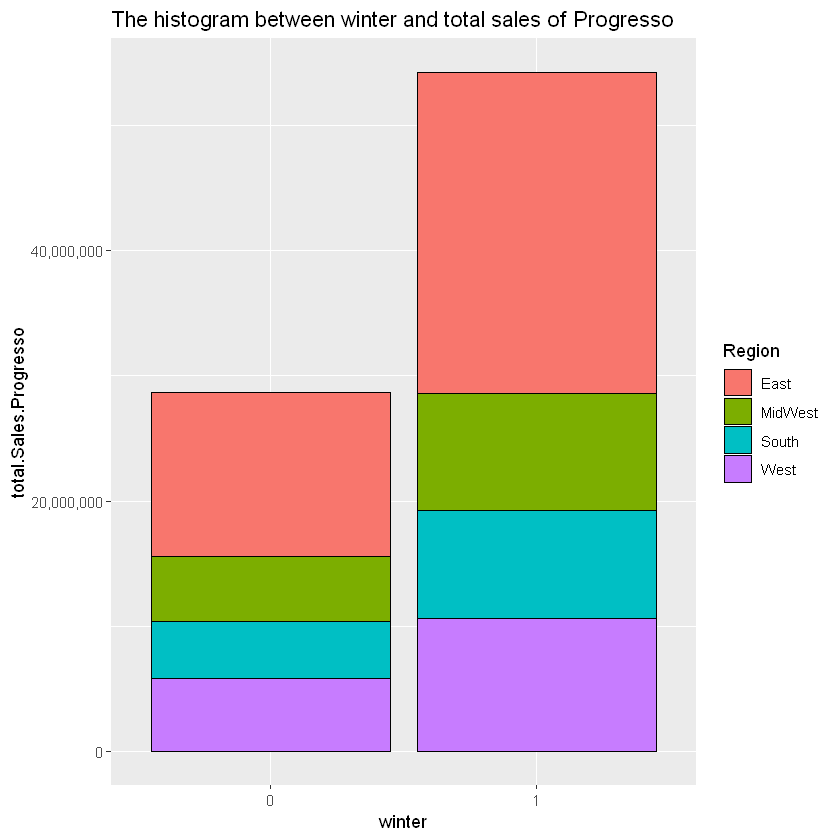

In [9]:
ggplot(data= new_DF, aes(x=winter , y= total.Sales.Progresso, fill= Region)) + 
    geom_histogram(stat = "identity", color = "Black") + scale_y_continuous(labels = comma)+
    ggtitle("The histogram between winter and total sales of Progresso")

> ### Winter has much higher Progresso sales in each region. This could be due to the winter holiday season. 

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

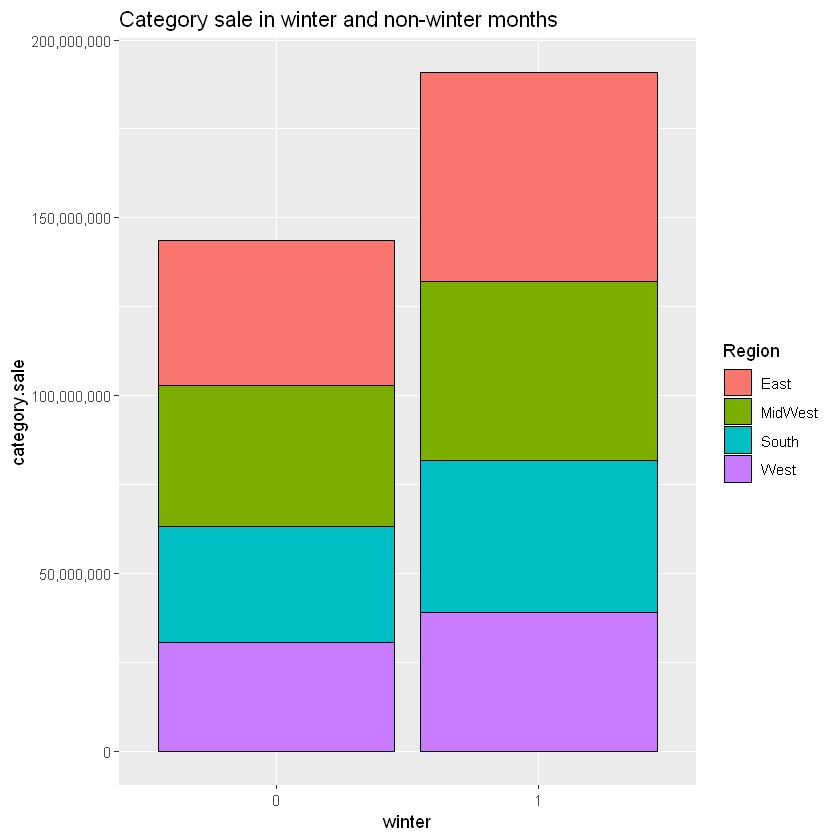

In [10]:
ggplot(data= new_DF, aes(x=winter , y= category.sale, fill= Region)) + 
    geom_histogram(stat = "identity", color = "Black") + scale_y_continuous(labels = comma) +
    ggtitle("Category sale in winter and non-winter months")

> ### Again the same case with category sales, Winter has a higher category sales. This again could be due to the winter holiday season. 

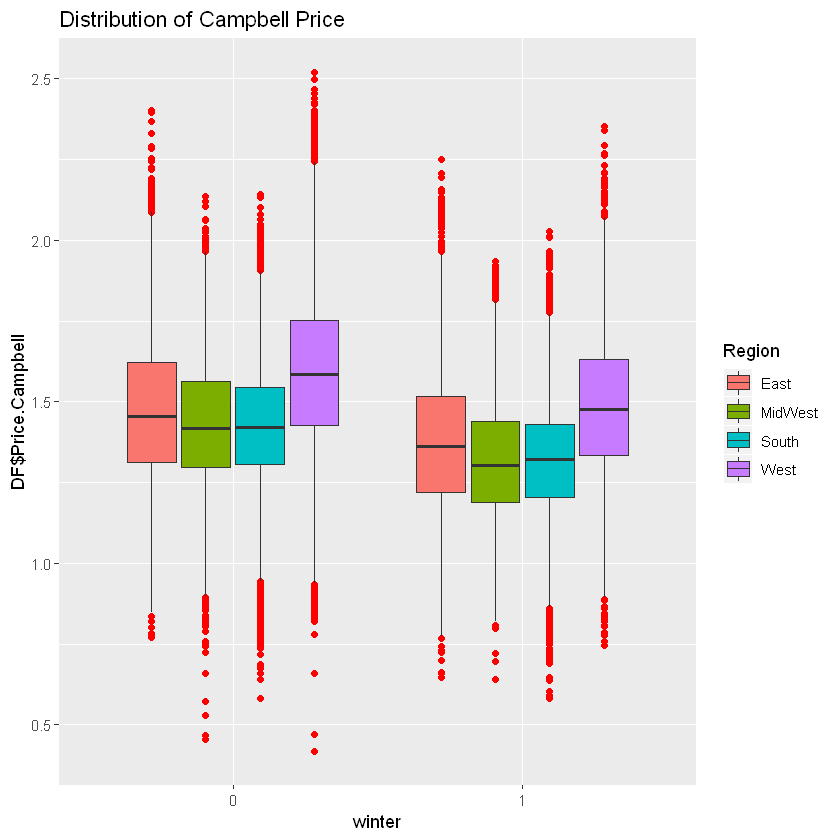

In [11]:
ggplot(data= DF, aes(x=winter , y= DF$Price.Campbell, fill= Region)) + 
    geom_boxplot(outlier.colour = "red") +
    ggtitle("Distribution of Campbell Price")
    

> ### We can also see how the mean price of campbell was low in winter months for all the regions which is intresting.

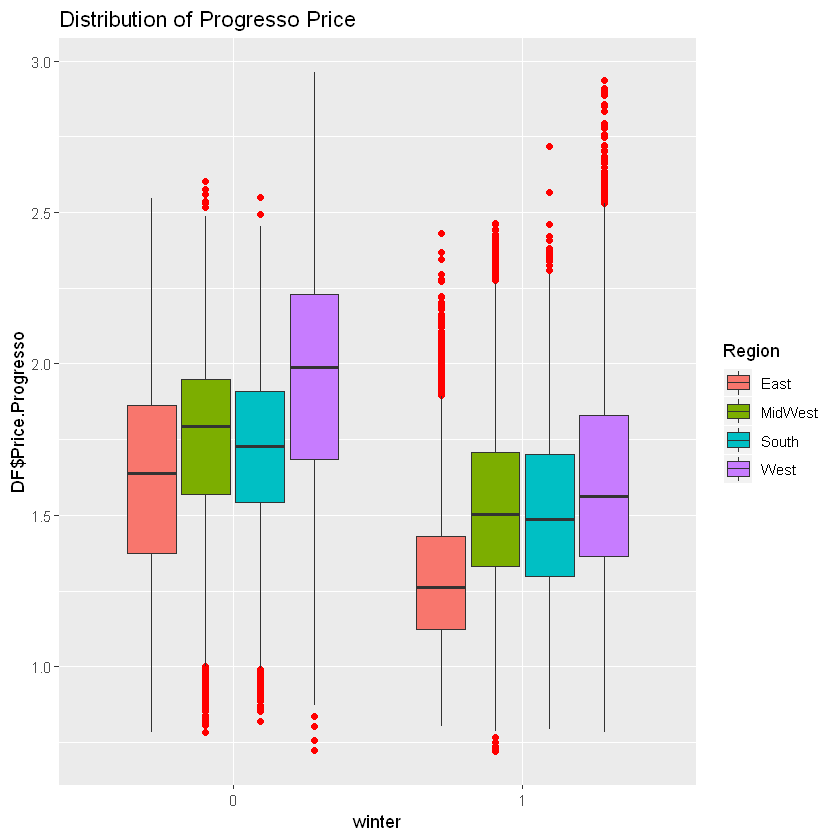

In [12]:
ggplot(data= DF, aes(x=winter , y= DF$Price.Progresso, fill= Region)) + 
    geom_boxplot(outlier.colour = "red")+
    ggtitle("Distribution of Progresso Price")
    

> ### Again a similar insight, we can see how the mean price of progresso was low in winter months, this time the mean difference is much bigger and so is the difference in the distribution.

### c. Compute the “Market Share” for Progresso (as percentage of total sales) in the Winter vs. non-Winter months
### Solution
     

In [13]:
new_DF

winter,Region,n,avg.price.campbell,mean.Price.PL,mean.Price.Progresso,total.Sales.Progresso,category.sale
0,East,7550,1.471857,1.160722,1.628456,13109700,40806340
0,MidWest,6616,1.431007,1.112147,1.761872,5250822,39869183
0,South,11956,1.421908,1.080281,1.715347,4561754,32435552
0,West,8220,1.595095,1.207617,1.945594,5794553,30674784
1,East,5401,1.372263,1.137854,1.302982,25630483,58690714
1,MidWest,4622,1.319524,1.052415,1.530809,9391863,50454976
1,South,8625,1.314185,1.037102,1.505001,8631430,42655277
1,West,6110,1.485874,1.171395,1.607643,10583585,39069926


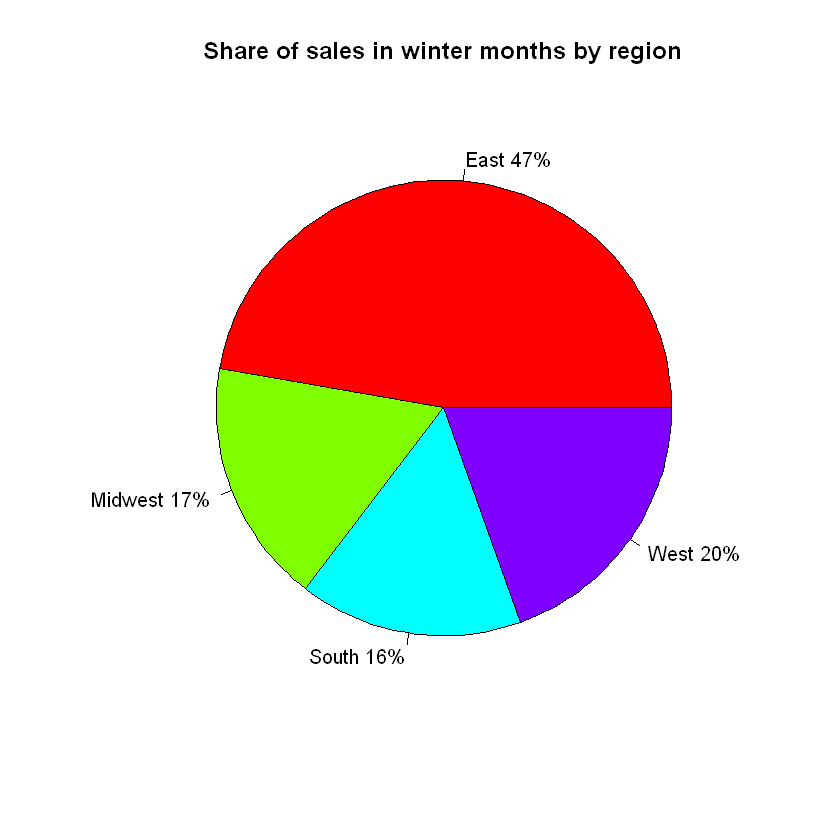

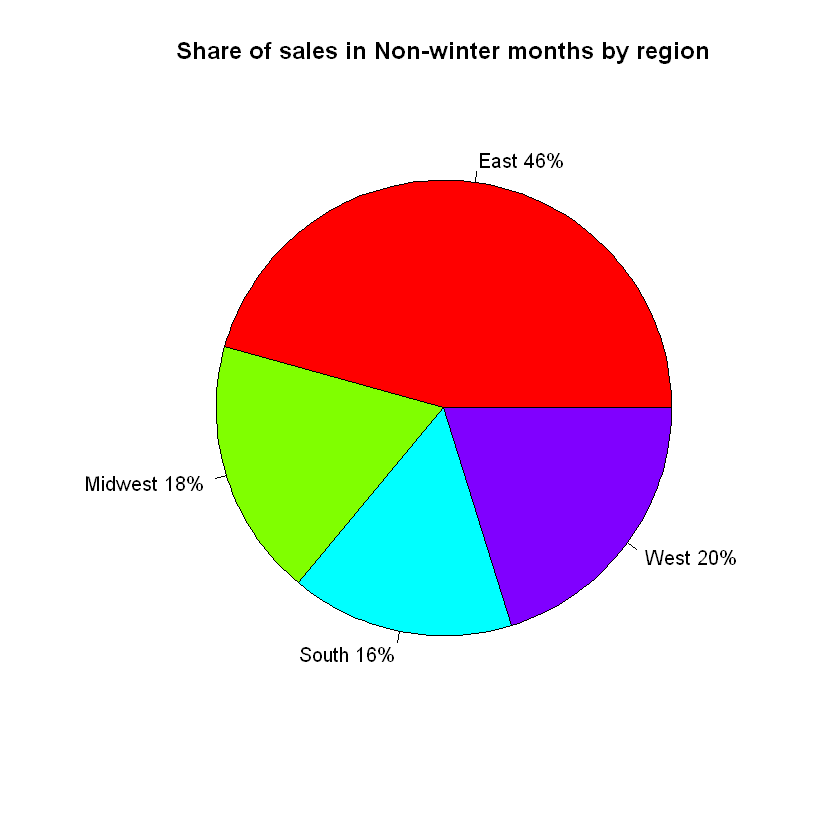

In [14]:
slices <- new_DF$total.Sales.Progresso[5:8]
lbls <- c("East", "Midwest", "South", "West")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=rainbow(length(lbls)),
   main="Share of sales in winter months by region")


slices <- new_DF$total.Sales.Progresso[1:4]
lbls <- c("East", "Midwest", "South", "West")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=rainbow(length(lbls)),
   main="Share of sales in Non-winter months by region")

In [15]:
NEW_DF =new_DF %>% group_by(winter) %>% summarise(total.Sales.Progresso= sum(total.Sales.Progresso))

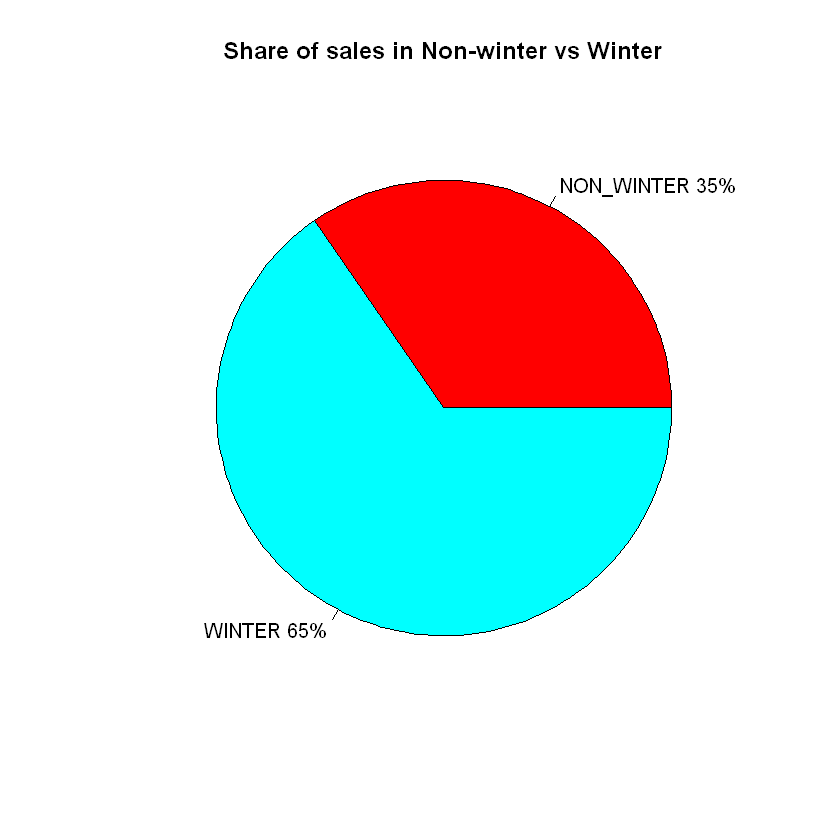

In [16]:
slices <- NEW_DF$total.Sales.Progresso
lbls <- c("NON_WINTER", "WINTER")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=rainbow(length(lbls)),
   main="Share of sales in Non-winter vs Winter")

> ### we can see 65% share of winter and 35% of NON winter sales share from the data

     
### 2. Develop a linear regression model to predict Progresso sales. Explain the results of the regression model (model strength, variable importance, relationship between the predictors and the dependent variable).

In [17]:
model_1 = lm(Sales.Progresso~ Month + Region+Low_Income+High_Income+Price.Campbell+Price.PL+Price.Progresso, data = DF)

In [18]:
summary(model_1)


Call:
lm(formula = Sales.Progresso ~ Month + Region + Low_Income + 
    High_Income + Price.Campbell + Price.PL + Price.Progresso, 
    data = DF)

Residuals:
   Min     1Q Median     3Q    Max 
 -4288   -841   -207    455  49267 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      5589.809     59.028   94.698  < 2e-16 ***
Month             -13.042      2.051   -6.357 2.07e-10 ***
RegionMidWest   -1124.123     22.698  -49.525  < 2e-16 ***
RegionSouth     -1804.503     19.857  -90.873  < 2e-16 ***
RegionWest      -1061.568     21.714  -48.888  < 2e-16 ***
Low_Income       -289.394     18.330  -15.788  < 2e-16 ***
High_Income       391.872     18.530   21.148  < 2e-16 ***
Price.Campbell    722.886     37.717   19.166  < 2e-16 ***
Price.PL          613.540     40.120   15.293  < 2e-16 ***
Price.Progresso -2876.283     22.661 -126.928  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1704 on 590